# Download the Dataset
Method 1
Download the dataset from the following link
(download the dataset to your local computer in the project directory of your choice):
https://www.openml.org/d/31
Method 2
Use Scikit-Learn library to directly download the dataset into your Python notebook.
Check out how?

In [10]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff(r'dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])
df.dropna()
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [13]:
from sklearn.preprocessing import LabelEncoder
df["class"]  = LabelEncoder().fit_transform(df["class"])

In [14]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,0


<Axes: >

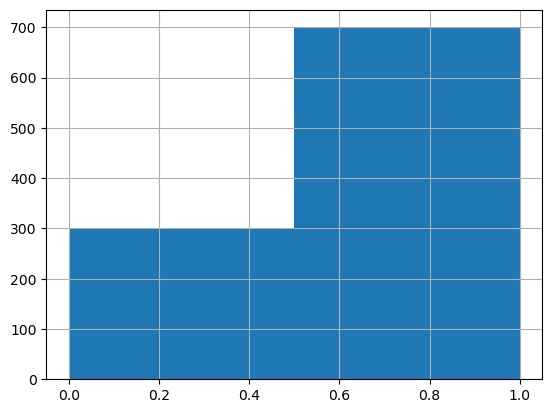

In [19]:
import matplotlib.pyplot as plt
df["class"].hist(bins=2)

/tmp/ipykernel_757/306261020.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

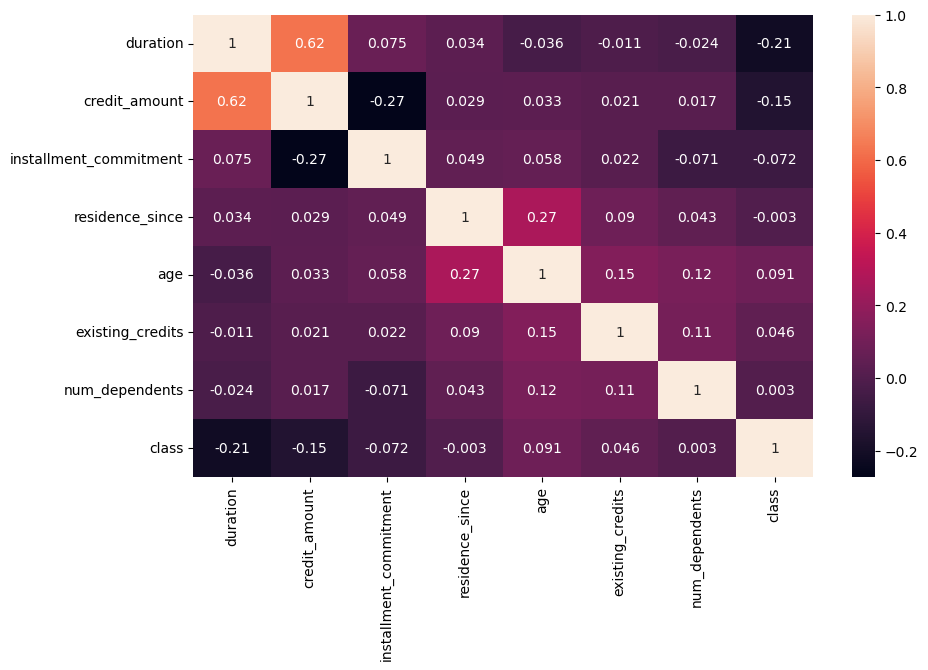

In [21]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

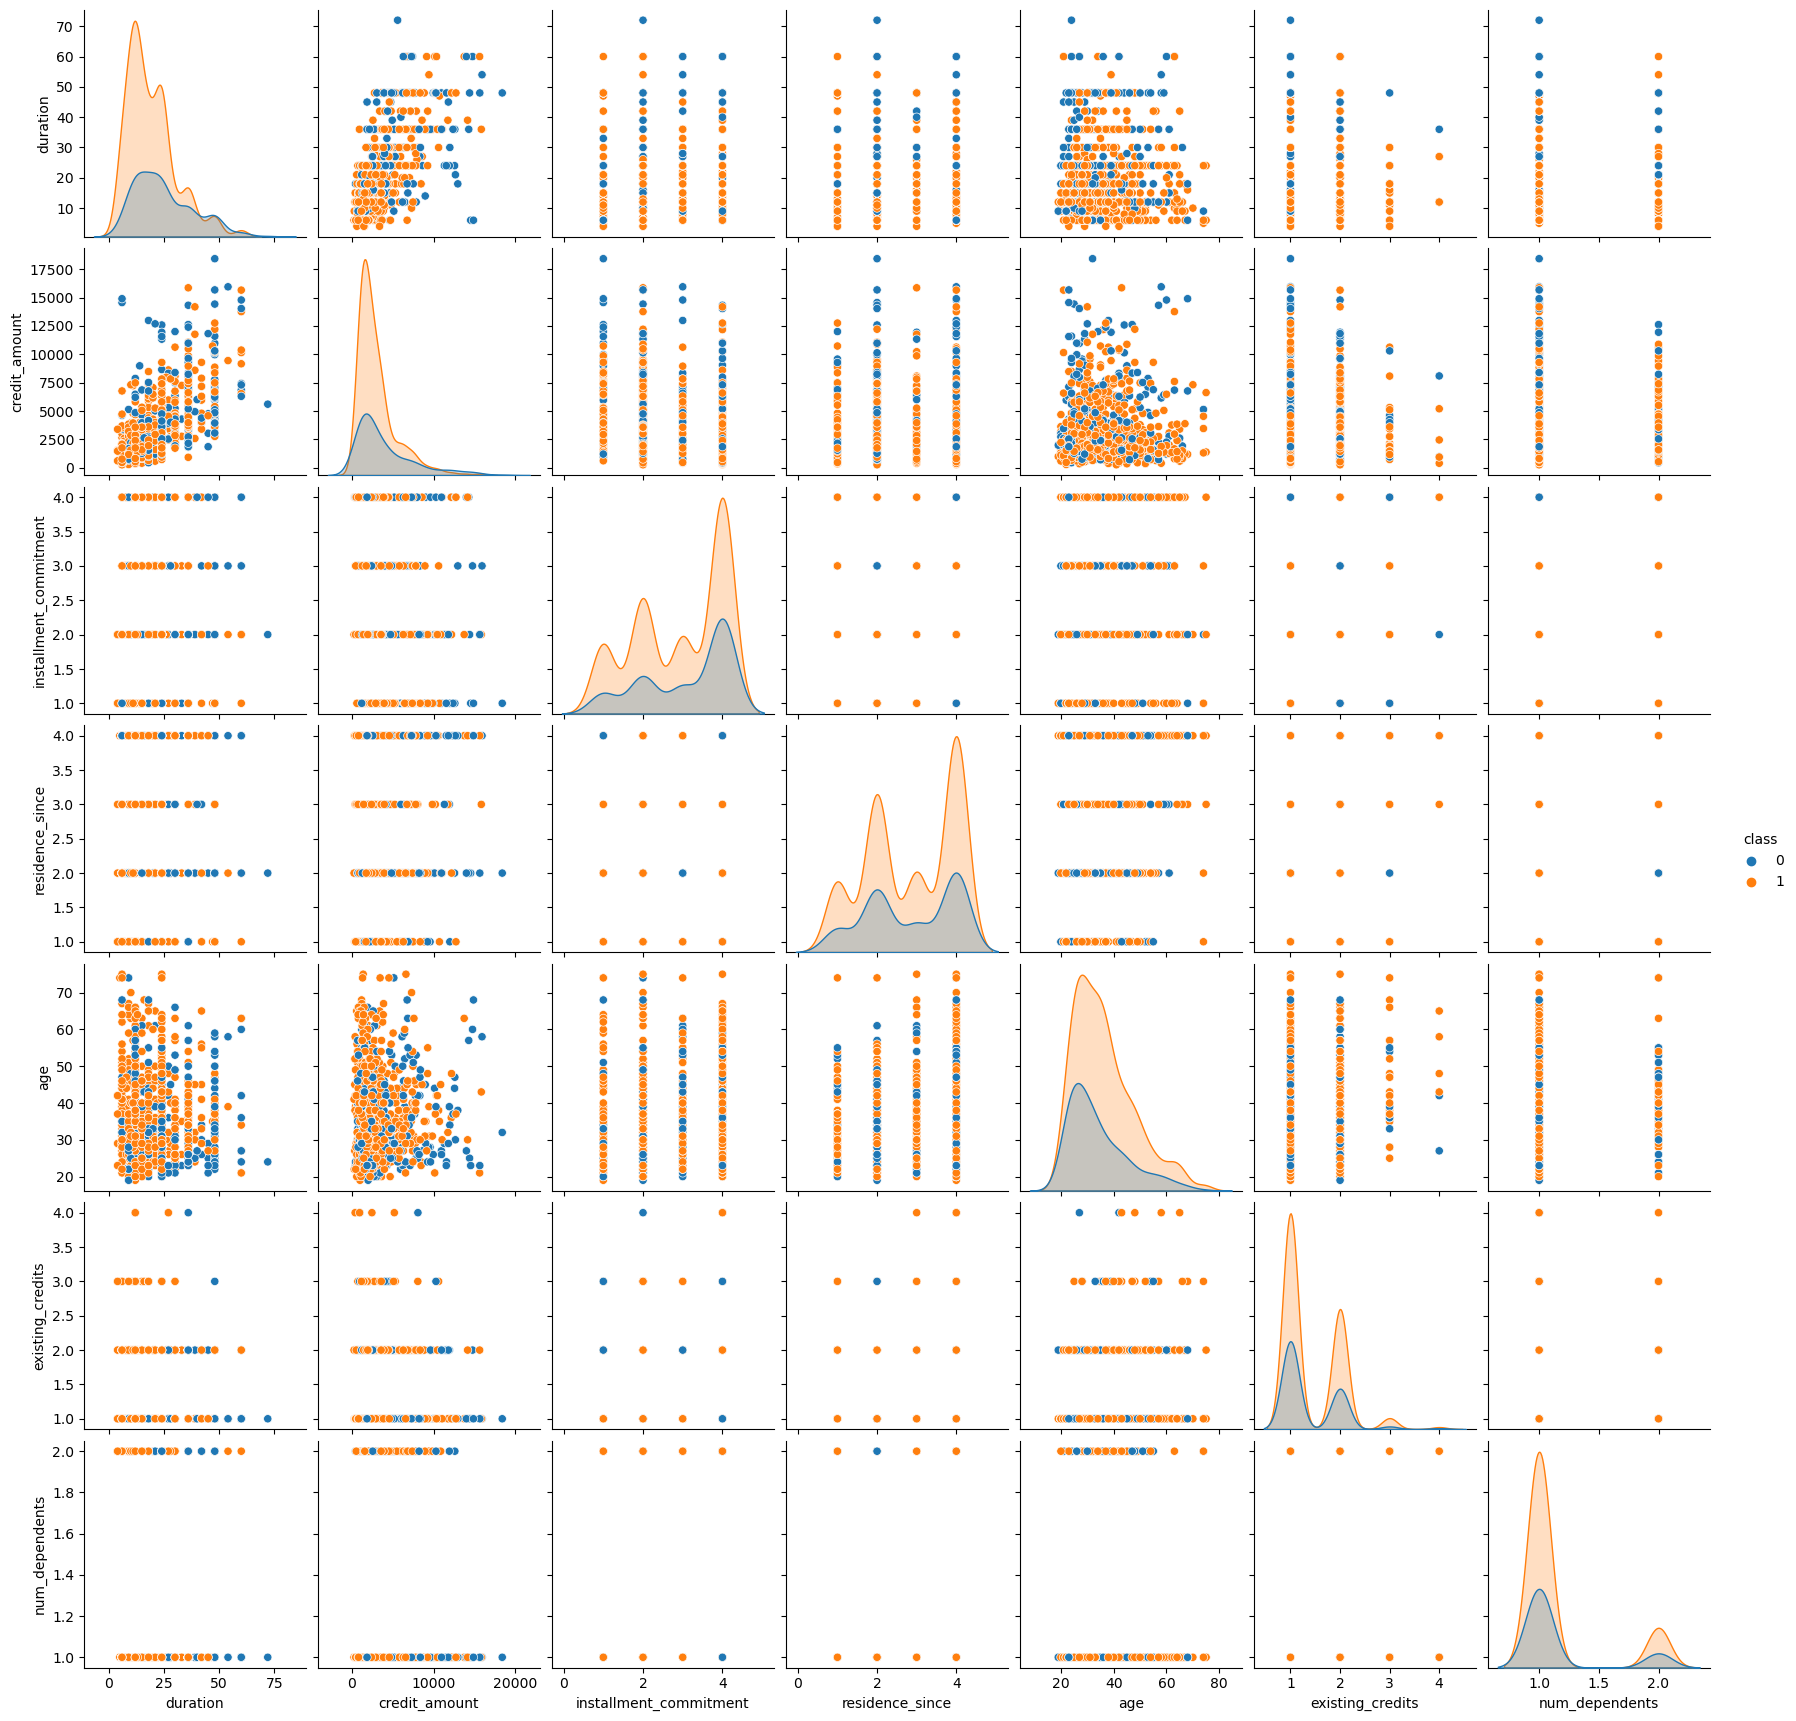

In [22]:
sns.pairplot(df,hue="class")

# 3 Feature Selection
Choose the features you think are relevant to our analysis! There are A LOT of features in this dataset, but we have to make our models training time reasonable for you.
You MUST include at least four (4) numeric features and at least three (3) nominal features. You can choose more if you prefer.

In [23]:
nominal = df[["credit_amount","age","existing_credits","num_dependents"]]
categorical = df[["credit_history","purpose","housing","job"]]

In [24]:
categorical

,credit_history,purpose,housing,job
0,critical/other existing credit,radio/tv,own,skilled
1,existing paid,radio/tv,own,skilled
2,critical/other existing credit,education,own,unskilled resident
3,existing paid,furniture/equipment,for free,skilled
4,delayed previously,new car,for free,skilled
...,...,...,...,...
995,existing paid,furniture/equipment,own,unskilled resident
996,existing paid,used car,own,high qualif/self emp/mgmt
997,existing paid,radio/tv,own,skilled
998,existing paid,radio/tv,for free,skilled


# 4 Preprocessing
Perform any needed preprocessing on the chosen features, including:
Scaling
Encoding
Dealing with NaN values
Note:
Use only the preprocessing steps you think are useful.

In [25]:
categorical = pd.get_dummies(categorical)

In [26]:
categorical

,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,...,purpose_repairs,purpose_retraining,purpose_used car,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
996,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [27]:
credit = pd.concat([nominal,categorical], axis = 1)

In [28]:
credit

,credit_amount,age,existing_credits,num_dependents,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,...,purpose_repairs,purpose_retraining,purpose_used car,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,1169.0,67.0,2.0,1.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5951.0,22.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2096.0,49.0,1.0,2.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,7882.0,45.0,1.0,2.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,4870.0,53.0,2.0,2.0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1736.0,31.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
996,3857.0,40.0,1.0,1.0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
997,804.0,38.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
998,1845.0,23.0,1.0,1.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# 5 Splitting the Data
Split your data as follows:
* 80% training set
* 10% validation set
* 10% test set

In [30]:
y = df["class"].values
x_columns = len(credit.columns)
x = credit.iloc[:,0:x_columns].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [34]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 0)

In [35]:
print(len(X_train), len(X_test), len(X_validate))

800 100 100


# 6 Training Classifiers
Use the KNN-classifier model to train your data.


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
knn.score(X_test,y_test)

0.64

Choose the best k for the k-nearest neighbor (KNN) algorithm by trying different values and validating performance on the validation set.


In [46]:
scores = []
neighbors = range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)
    
print(scores)

[0.59, 0.53, 0.64, 0.56, 0.68, 0.67, 0.66, 0.58, 0.65, 0.65, 0.65, 0.65, 0.69, 0.63, 0.67, 0.65, 0.66, 0.66, 0.67]


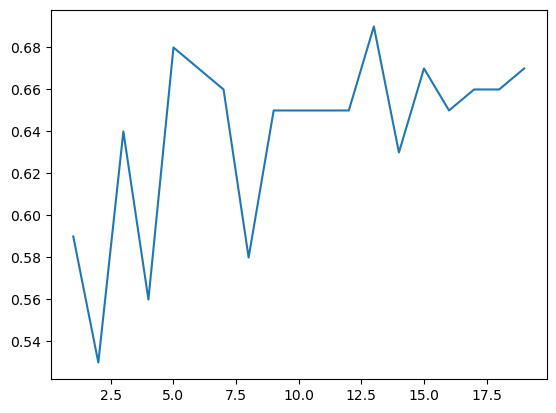

In [47]:
plt.plot(neighbors,scores)

Note: choosing the best k is an example of hyper-parameter tuning.
Classification Metrics


In [48]:
knn = KNeighborsClassifier(n_neighbors=13).fit(X_train,y_train)

Print the accuracy score of your final classifier.

In [49]:
result = knn.score(X_validate,y_validate)
print("Accuracy = ", result)

Accuracy =  0.75


Print the confusion matrix.

In [52]:
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_validate)
print('Confusion Matrix: \n',confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[ 8 21]
 [ 4 67]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)
result = model.